# Recurrent Neural Network(RNN) , it is known as forward recurrent neural network.Are the state of the art algorithm for sequential data and are used by Apple's Siri and Google's voice search. It is the first algorithm that remembers the input, due to an internal memory, which makes it perfectly suited for machine learning problems that involve sequential data
1. Sequence
2. Time series Data

* Types of Recurrent Neural Network
1. one to one(ex.SIMPLE ML PROBLEM)
2. one to many(ex.IMAGE CAPTIONING)
3. many to many(ex.GOOGLE TRANSLATE, SPEECH TRANSLATE(MACHINE TRANSLATE)
4. many to one(ex.REVIEW SEGMENTATION)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
df = pd.read_csv('Google_Stock_Price_train.csv')

In [3]:
df.head(6)

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
5,1/10/2012,313.70,315.72,307.30,621.43,"8,824,000"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [5]:
df.describe()

,Open,High,Low
count,1258.000000,1258.000000,1258.000000
mean,533.709833,537.880223,529.007409
std,151.904442,153.008811,150.552807
min,279.120000,281.210000,277.220000
25%,404.115000,406.765000,401.765000
50%,537.470000,540.750000,532.990000
75%,654.922500,662.587500,644.800000
max,816.680000,816.680000,805.140000


In [6]:
df.shape

(1258, 6)

In [7]:
df.size

7548

In [8]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [9]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [10]:
df.isnull().sum()/len(df)

Date      0.0
Open      0.0
High      0.0
Low       0.0
Close     0.0
Volume    0.0
dtype: float64

In [11]:
df.isnull().sum()/len(df)*100

Date      0.0
Open      0.0
High      0.0
Low       0.0
Close     0.0
Volume    0.0
dtype: float64

<AxesSubplot:>

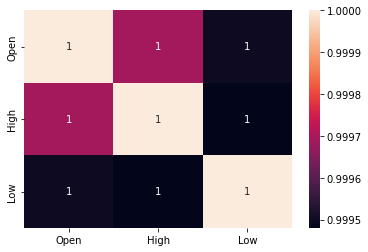

In [12]:
sns.heatmap(df.corr(), annot = True)

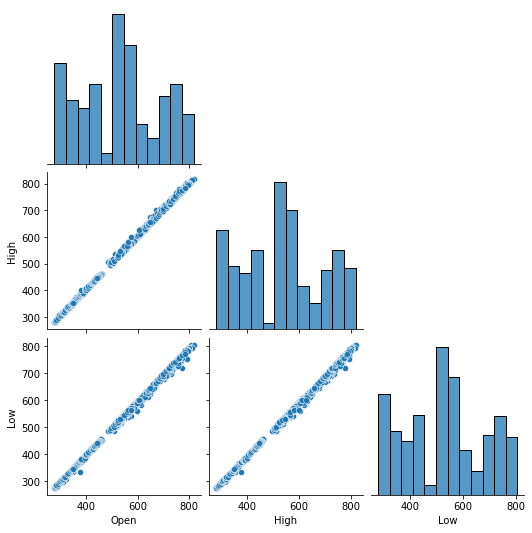

In [13]:
sns.pairplot(df,corner = True)

In [14]:
df_test = pd.read_csv('Google_Stock_Price_Test.csv')

In [15]:
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [16]:
training_set = df.iloc[:,1:2].values

In [17]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [18]:
type(training_set)

numpy.ndarray

In [19]:
# Feature Scalling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set_scaled = sc.fit_transform(training_set)

In [20]:
df['Open'].head(60)

0     325.25
1     331.27
2     329.83
3     328.34
4     322.04
5     313.70
6     310.59
7     314.43
8     311.96
9     314.81
10    312.14
11    319.30
12    294.16
13    291.91
14    292.07
15    287.68
16    284.92
17    284.32
18    287.95
19    290.41
20    291.38
21    291.34
22    294.23
23    296.39
24    302.44
25    303.18
26    304.87
27    302.81
28    304.11
29    304.63
30    305.32
31    300.28
32    301.36
33    300.81
34    304.84
35    302.37
36    302.54
37    302.16
38    303.86
39    308.14
40    309.97
41    309.84
42    309.06
43    302.89
44    303.39
45    303.88
46    302.84
47    298.88
48    303.24
49    306.35
50    307.15
51    309.29
52    310.40
53    314.28
54    316.12
55    318.06
56    322.09
57    321.30
58    322.31
59    324.80
Name: Open, dtype: float64

# Creating a Data with 60 timestamp and 1 o/p

In [21]:
x_train = []
y_train = []
for i in range(60,1258):
    x_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [22]:
type(x_train)

numpy.ndarray

In [23]:
type(y_train)

numpy.ndarray

In [24]:
x_train.shape

(1198, 60)

In [25]:
#(1198,60,1)
#Reshaping the data
x_train= np.reshape(x_train,(x_train.shape[0], x_train.shape[1],1))

In [26]:
x_train.shape

(1198, 60, 1)

In [27]:
# Building The RNN Model

In [28]:
# Importing Libraries
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM #(Long Short Term m/m)

In [29]:
from keras.layers import Dropout

In [30]:
rnn_reg = Sequential()
# Adding First LSTM Layer
rnn_reg.add(LSTM(units = 50, return_sequences = True, input_shape=(x_train.shape[1],1)))

In [31]:
rnn_reg.add(Dropout(0.2))

In [32]:
# Adding Second LSTM Layer
rnn_reg.add(LSTM(units = 50, return_sequences = True))
rnn_reg.add(Dropout(0.2))

In [33]:
# Adding Third LSTM Layer
rnn_reg.add(LSTM(units = 50, return_sequences = True))
rnn_reg.add(Dropout(0.2))

In [34]:
# Adding Fourth LSTM Layer
rnn_reg.add(LSTM(units=50))
rnn_reg.add(Dropout(0.2))

In [35]:
# Adding The Output Layer

In [36]:
rnn_reg.add(Dense(units = 1))

In [37]:
# Model Compilation
rnn_reg.compile(optimizer = 'adam', loss= 'mse', metrics=['mae'])

In [38]:
# Model Summary
rnn_reg.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [39]:
# Model Training
rnn_reg.fit(x_train, y_train, validation_split = 0.33, batch_size = 32, epochs =100)

Epoch 1/100
26/26 [==============================] - 10s 135ms/step - loss: 0.0234 - mae: 0.1146 - val_loss: 0.0537 - val_mae: 0.2209
Epoch 2/100
26/26 [==============================] - 2s 68ms/step - loss: 0.0041 - mae: 0.0498 - val_loss: 0.0244 - val_mae: 0.1437
Epoch 3/100
26/26 [==============================] - 2s 67ms/step - loss: 0.0046 - mae: 0.0517 - val_loss: 0.0183 - val_mae: 0.1209
Epoch 4/100
26/26 [==============================] - 2s 69ms/step - loss: 0.0028 - mae: 0.0409 - val_loss: 0.0167 - val_mae: 0.1149
Epoch 5/100
26/26 [==============================] - 2s 69ms/step - loss: 0.0026 - mae: 0.0398 - val_loss: 0.0131 - val_mae: 0.1004
Epoch 6/100
26/26 [==============================] - 2s 67ms/step - loss: 0.0025 - mae: 0.0396 - val_loss: 0.0132 - val_mae: 0.1009
Epoch 7/100
26/26 [==============================] - 2s 69ms/step - loss: 0.0025 - mae: 0.0383 - val_loss: 0.0164 - val_mae: 0.1145
Epoch 8/100
26/26 [==============================] - 2s 68ms/step - loss: 

# Real Stock Price Of 2017

In [40]:
df_test = pd.read_csv('Google_Stock_Price_Test.csv')
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [41]:
real_stock_price = df_test.iloc[:,1:2].values

In [42]:
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [43]:
# Merging Two DataSet

In [44]:
dataset_total = pd.concat((df['Open'], df_test['Open']), axis = 0)
len(dataset_total)

1278

In [45]:
len(dataset_total)

1278

In [46]:
len(df_test)

20

In [47]:
1258-60

1198

In [48]:
inputs = dataset_total[len(dataset_total)-len(df_test)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
x_test = []
for i in range(60,80):
    x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
predicted_stock_price = rnn_reg.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 2s 2s/step


In [49]:
predicted_stock_price

array([[745.957  ],
       [744.2814 ],
       [743.13367],
       [742.678  ],
       [743.4018 ],
       [745.80707],
       [749.4529 ],
       [753.2351 ],
       [756.463  ],
       [758.78357],
       [760.1171 ],
       [760.5349 ],
       [760.2565 ],
       [759.713  ],
       [759.21576],
       [759.8908 ],
       [762.23236],
       [766.21295],
       [770.6935 ],
       [773.3151 ]], dtype=float32)

# Visualizing the Trend Line

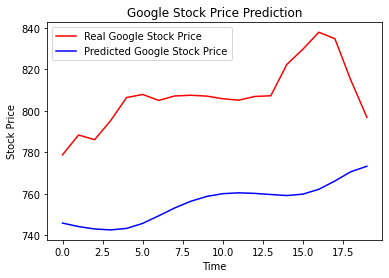

In [50]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue',label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()